In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

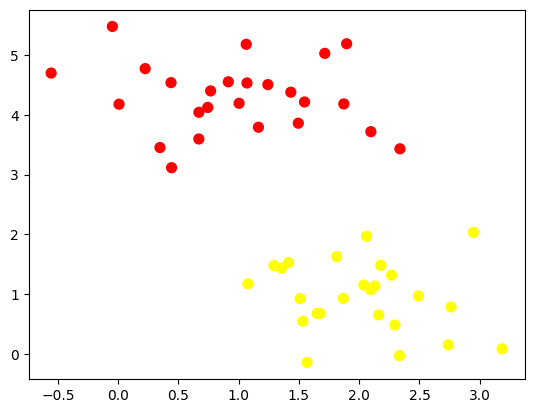

In [14]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

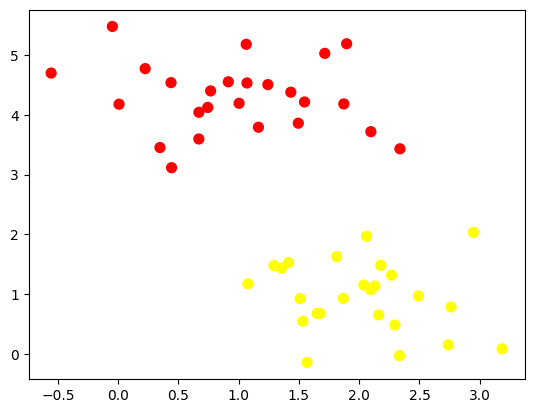

In [15]:
y = np.where(y == 0, -1, 1) # convert 0 to -1 for perceptron

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # loop through dataset multiple times
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)  # predict using current weights

                # subgradient calculation --> update only if misclassified
                if y[idx] * linear_output <= 0: # is the point misclassified?
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)

In [ ]:
class HingeSVM:
    def __init__(self, learning_rate=0.01, n_iters=1000, reg_lambda=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.reg_lambda = reg_lambda
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) + self.bias)

                # subgradient calculation
                if condition >= 1: # if the point is correctly classified and outside the margin
                    dw = 2 * self.reg_lambda * self.weights
                    db = 0
                else:
                    # misclassified or within margin
                    dw = 2 * self.reg_lambda * self.weights - y[idx] * x_i
                    db = -y[idx]
                # update step
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
    
    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)
    
    def score(self, X, y):
        return np.mean(y == self.predict(X))

Hinge-SVM Accuracy: 1.0
Perceptron Accuracy: 1.0


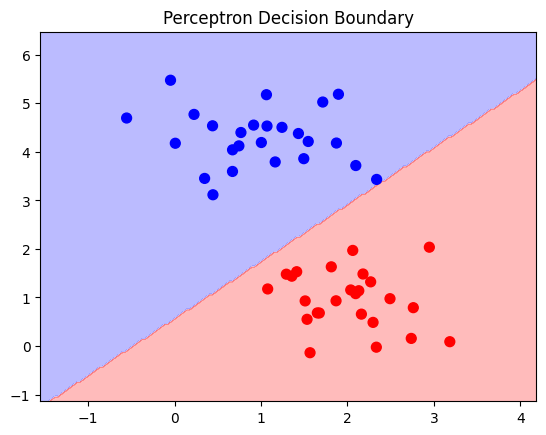

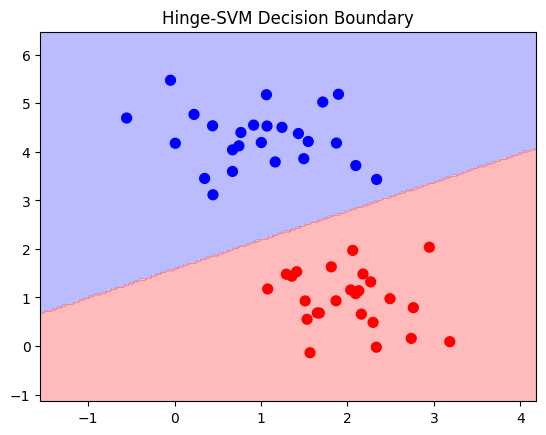

In [18]:
# train perceptron
ppn = Perceptron(learning_rate=0.1, n_iters=1000)
ppn.fit(X, y)

# train hinge SVM
svm = HingeSVM(learning_rate=0.001, n_iters=1000, reg_lambda=0.01)
svm.fit(X, y)
print("Hinge-SVM Accuracy:", svm.score(X, y))

# test accuracy
acc = ppn.score(X, y)
print("Perceptron Accuracy:", acc)

def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
    plt.title(title)
    plt.show()

plot_boundary(ppn, X, y, "Perceptron Decision Boundary")
plot_boundary(svm, X, y, "Hinge-SVM Decision Boundary")

# visualize decision boundary
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Z = ppn.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
# plt.show()

Because the perceptron implementation only punishes misclassification and doesn't punish points that fall within the margin, we can see that the resulting decision boundary is right up against the furthest point for our class grouping. The perceptron is satisfied with finding a separating line anywhere that correctly classfies the points in the set. However, the hinge-SVM maximizes the margin which guides the boundary closer to the center of the two clusters. This helps our prediction be more robust to future points near the boundary, while the perceptron might misclassify them.